Unzip dataset



In [ ]:
!unzip train
print("done")

Output streaming troncato alle ultime 5000 righe.
 extracting: train/1/1310.png        
 extracting: train/1/0442.png        
 extracting: train/1/0399.png        
 extracting: train/1/0298.png        
 extracting: train/1/0865.png        
 extracting: train/1/0453.png        
 extracting: train/1/1078.png        
 extracting: train/1/1205.png        
 extracting: train/1/0237.png        
 extracting: train/1/1462.png        
 extracting: train/1/1422.png        
 extracting: train/1/0473.png        
 extracting: train/1/0591.png        
 extracting: train/1/1282.png        
 extracting: train/1/0246.png        
 extracting: train/1/1393.png        
 extracting: train/1/1207.png        
 extracting: train/1/1025.png        
 extracting: train/1/0721.png        
 extracting: train/1/0507.png        
 extracting: train/1/1074.png        
 extracting: train/1/0447.png        
 extracting: train/1/0681.png        
 extracting: train/1/0684.png        
 extracting: train/1/0042.png        


In [ ]:
#IMPORT
import os
import cv2
import scipy
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from collections import defaultdict
from matplotlib import pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from tensorflow import keras
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=True,
    rescale=1./255
)

Data Loading

In [ ]:
Train = datagen.flow_from_directory(
    'train',
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)

Found 6369 images belonging to 5 classes.


dataset visualization

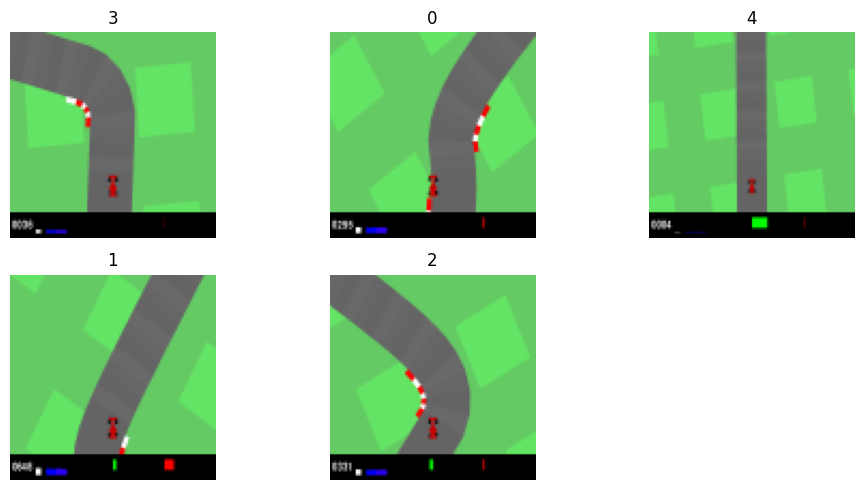

In [ ]:
# Percorso della directory del dataset
dataset_path = 'train'

# Ottenere elenco di sottodirectory (classi) nella directory del dataset
classes = os.listdir(dataset_path)

train_labels = []
train_labels = Train.classes
num_classes = Train.num_classes
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)

# Mostra un'immagine per classe
plt.figure(figsize=(10, 5))
for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    img_path = os.path.join(class_path, os.listdir(class_path)[0])  # Prendi la prima immagine in ogni classe
    img = Image.open(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.tight_layout()
plt.show()

2nd Architecture

In [ ]:

# Inizializzazione del modello
model = Sequential()

# Primo strato convoluzionale con regularizzazione L2
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3), kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Secondo strato convoluzionale con regularizzazione L2
model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Terzo strato convoluzionale con regularizzazione L2
model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Quarto strato convoluzionale senza regularizzazione
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Primo strato denso con regularizzazione L2
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

# Secondo strato denso senza regularizzazione
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
num_classes = 5
model.add(Dense(num_classes, activation='softmax'))

# Compilazione del modello
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Riepilogo del modello
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 62, 62, 64)       

In [ ]:
model.add(Dense(num_classes, activation='softmax'))
# Aggiunge un ultimo layer completamente connesso con una funzione di attivazione softmax per ottenere le probabilità delle classi.


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# %%
beta_1 = 0.9
beta_2 = 0.999
optimizer = Adam(learning_rate=0.01, beta_1=beta_1, beta_2=beta_2)

# %%
model.compile(optimizer, loss=tf._losses.CategoricalCrossentropy(), metrics=['accuracy'])

# %%
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7c8bc657b7f0>>

## Hyperparameters

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

class_labels = np.unique(train_labels)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = dict(zip(class_labels, class_weights))
# Definisci un callback per salvare il modello solo se l'accuracy validation migliora
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
hist = model.fit(Train, epochs=25, callbacks=[tensorboard_callback], class_weight=class_weights_dict)

Epoch 1/25
200/200 [==============================] - 94s 462ms/step - loss: 41.0839 - accuracy: 0.2278
Epoch 2/25
200/200 [==============================] - 92s 458ms/step - loss: 1.6102 - accuracy: 0.1881
Epoch 3/25
200/200 [==============================] - 93s 464ms/step - loss: 1.6102 - accuracy: 0.2173
Epoch 4/25
200/200 [==============================] - 93s 467ms/step - loss: 1.6104 - accuracy: 0.2275
Epoch 5/25
200/200 [==============================] - 93s 466ms/step - loss: 1.6103 - accuracy: 0.1620
Epoch 6/25
200/200 [==============================] - 93s 464ms/step - loss: 2.8753 - accuracy: 0.2131
Epoch 7/25
200/200 [==============================] - 93s 464ms/step - loss: 1.6103 - accuracy: 0.1862
Epoch 8/25
200/200 [==============================] - 93s 464ms/step - loss: 1.6115 - accuracy: 0.1945
Epoch 9/25
200/200 [==============================] - 92s 462ms/step - loss: 1.6108 - accuracy: 0.1941
Epoch 10/25
200/200 [==============================] - 92s 461ms/step - 

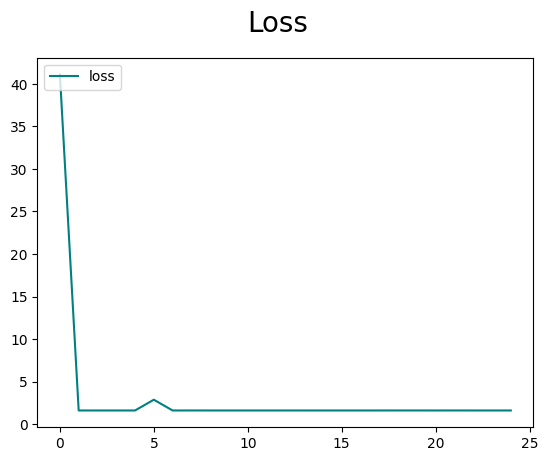

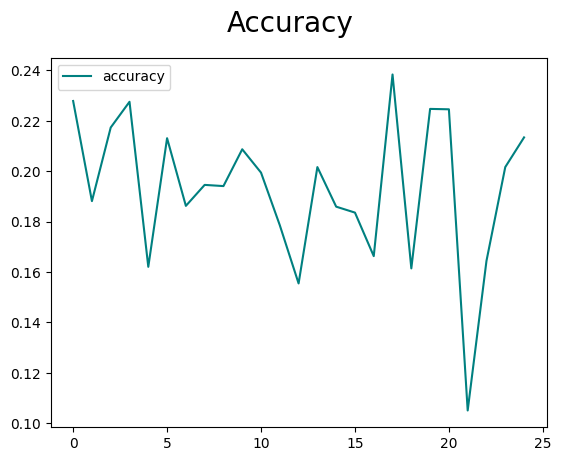

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

2nd approach transfer learning

model training and validation

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

class_labels = np.unique(train_labels)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = dict(zip(class_labels, class_weights))
hist = model.fit(Train, epochs=5, callbacks=[tensorboard_callback], class_weight=class_weights_dict)

Epoch 1/5
200/200 [==============================] - 92s 461ms/step - loss: 1.6112 - accuracy: 0.2143
Epoch 2/5
200/200 [==============================] - 92s 461ms/step - loss: 1.6109 - accuracy: 0.2085
Epoch 3/5
200/200 [==============================] - 92s 460ms/step - loss: 1.6105 - accuracy: 0.1897
Epoch 4/5
200/200 [==============================] - 92s 460ms/step - loss: 1.6109 - accuracy: 0.2278
Epoch 5/5
200/200 [==============================] - 91s 455ms/step - loss: 1.6106 - accuracy: 0.1250


TEst

In [ ]:
!unzip testt
print("done")

Archive:  testt.zip
   creating: test/0/
 extracting: test/0/0083.png         
 extracting: test/0/0127.png         
 extracting: test/0/0117.png         
 extracting: test/0/0054.png         
 extracting: test/0/0044.png         
 extracting: test/0/0095.png         
 extracting: test/0/0096.png         
  inflating: test/0/0024.png         
 extracting: test/0/0036.png         
 extracting: test/0/0089.png         
 extracting: test/0/0029.png         
 extracting: test/0/0047.png         
 extracting: test/0/0074.png         
 extracting: test/0/0025.png         
 extracting: test/0/0092.png         
 extracting: test/0/0073.png         
 extracting: test/0/0066.png         
 extracting: test/0/0111.png         
 extracting: test/0/0131.png         
 extracting: test/0/0046.png         
 extracting: test/0/0078.png         
 extracting: test/0/0098.png         
 extracting: test/0/0091.png         
 extracting: test/0/0005.png         
 extracting: test/0/0088.png         
 extracti

In [ ]:
Test = tf.keras.utils.image_dataset_from_directory('test')
test_iterator = Test.as_numpy_iterator()

all_X_test = []
all_y_test = []

for test_batch in test_iterator:
    X_test_batch, y_test_batch = test_batch
    X_test_normalized_batch = X_test_batch/255.0
    yhat_batch = model.predict(X_test_normalized_batch)
    all_X_test.append(X_test_normalized_batch)
    all_y_test.append(y_test_batch)

X_test_normalized = np.concatenate(all_X_test)
y_test = np.concatenate(all_y_test)

test_iterator = Test.as_numpy_iterator()
Test_batch = next(test_iterator)
X_test, y_test = Test_batch
X_test_normalized = X_test/255.0

Found 2749 files belonging to 5 classes.
1/1 [==============================] - 1s 715ms/step


In [ ]:
yhat = model.predict(X_test_normalized)

pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in Test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    y_one_hot = tf.keras.utils.to_categorical(y, num_classes=num_classes)
    pre.update_state(y_one_hot, yhat)
    re.update_state(y_one_hot, yhat)
    acc.update_state(y_one_hot, yhat)

1/1 [==============================] - 0s 29ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.1000363752245903, Recall:0.1000363752245903, Accuracy:0.6400145292282104


In [ ]:
fig=plt.figure(figsize=(16, 8))
# insert comparison on accuracies

plt.suptitle('Model accuracy comparison on train', fontsize=14)
plt.show()

<Figure size 1600x800 with 0 Axes>

In [ ]:
fig=plt.figure(figsize=(16, 8))
# insert comparison on accuracies

plt.suptitle('Model accuracy comparison on test', fontsize=14)
plt.show()

<Figure size 1600x800 with 0 Axes>